---

In [7]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plottingimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns


import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 




---

In [8]:
import os
os.getcwd()



'/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/PHDML'

In [9]:
os.chdir("/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/PHDML")



---

In [89]:
Train_PYMNT = pd.read_excel("Train_PaymentHistory.xlsx") # Train Dataset
Train = pd.read_excel("Train.xlsx") # Train Dataset

---

In [11]:
print(Train_PYMNT.shape)

(269778, 19)


In [12]:
print(Train.shape)

(11093, 9)


---

In [13]:
print(type(Train_PYMNT))

<class 'pandas.core.frame.DataFrame'>


In [14]:
print(type(Train))

<class 'pandas.core.frame.DataFrame'>


---

In [15]:
Train_PYMNT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269778 entries, 0 to 269777
Data columns (total 19 columns):
CustomerID                                269778 non-null object
Current_Instalment_Sequence               269778 non-null int64
Starting_Instalment                       269778 non-null int64
Maturity_Period                           269778 non-null int64
Current_Outstanding                       269778 non-null float64
Current_Loan_to_Appraisedvalu_Percent     269778 non-null float64
CurrentInterestrate                       269778 non-null float64
RealEstate_Current_Inflation              269778 non-null float64
GDP                                       269778 non-null float64
UnemploymentRate                          269778 non-null float64
Asset_type                                269778 non-null object
Urban_Development                         269778 non-null object
Villa_House                               269778 non-null object
Investment_SelfOccupied                  

In [16]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 9 columns):
CustomerID               11093 non-null object
DOB                      11093 non-null object
Salary                   11093 non-null float64
ProfessionalLicensure    11093 non-null int64
UtilitySpending          11093 non-null float64
eCommerceAccount         11093 non-null int64
SocialMediaAccount       11093 non-null object
NoOfProperties           11093 non-null int64
CreditRiskScore          11093 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 780.1+ KB


---

In [17]:
Train_PYMNT.describe()

,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation
count,269778.000000,269778.000000,269778.000000,2.697780e+05,269778.000000,269778.000000,269778.000000,269778.000000,269778.000000,2.697780e+05,269778.000000,269778.000000,269778.000000
mean,37.644500,23.704264,135.277528,2.444245e+05,82.240253,6.618927,1.792160,1.203403,6.882192,2.586727e+05,78.131288,5.745037,1.958738
std,11.088145,5.337893,21.384173,2.263373e+05,25.576340,2.030486,0.265739,2.040205,1.967250,2.353700e+05,10.389990,2.821784,0.349696
min,1.000000,1.000000,29.000000,0.000000e+00,0.000000,0.250000,1.078300,-4.146711,3.800000,1.046520e+04,50.100000,0.000000,0.757300
25%,30.000000,20.000000,135.000000,9.294234e+04,64.643815,5.625000,1.562100,0.892996,5.000000,1.000000e+05,73.200000,5.250000,1.794500
50%,37.000000,24.000000,141.000000,1.701912e+05,82.348070,6.500000,1.733500,1.692969,6.500000,1.800000e+05,80.000000,6.250000,2.127300
75%,46.000000,28.000000,145.000000,3.465733e+05,101.714058,7.750000,2.006700,2.556052,9.000000,3.680000e+05,80.000000,7.375000,2.223900
max,60.000000,51.000000,200.000000,8.701859e+06,169.357840,37.500000,2.262900,5.132464,10.000000,8.000000e+06,125.000000,18.000000,2.262900


In [18]:
Train.describe()

,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,NoOfProperties,CreditRiskScore
count,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000,11093.000000
mean,4376.365891,0.572343,342.179622,0.522582,1.429550,627.486703
std,10439.657704,0.494761,90.487895,0.499512,0.815476,148.092576
min,1000.000000,0.000000,185.700917,0.000000,1.000000,350.000000
25%,1392.000000,0.000000,264.933308,0.000000,1.000000,497.000000
50%,1845.000000,1.000000,341.689687,1.000000,1.000000,641.000000
75%,4039.015562,1.000000,420.922078,1.000000,2.000000,778.000000
max,412300.000000,1.000000,495.202445,1.000000,4.000000,830.000000


---

In [19]:
Train_PYMNT.head()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,Asset_type,Urban_Development,Villa_House,Investment_SelfOccupied,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation,Payment_Status
0,C12116,25,25,113,41303.42,24.498336,9.2,2.2629,2.899137,4.7,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default
1,C12116,26,25,113,41061.95,24.483867,9.2,2.2510,2.151365,4.7,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default
2,C12116,27,25,113,40804.42,24.626795,9.2,2.2239,2.361722,4.4,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default
3,C12116,28,25,113,40483.89,24.735883,9.2,2.1967,1.229172,4.6,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default
4,C12116,29,25,113,40367.06,24.925476,9.2,2.1737,1.692969,4.5,No shred services,No,Yes,Self Occupancy,45000.0,69.4,9.2,0.8703,Non-Payoff/Non-Default


In [20]:
Train_PYMNT.tail()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,Asset_type,Urban_Development,Villa_House,Investment_SelfOccupied,Starting_outstanding,Starting_Loan_to_Appraisedvalu_Percent,StartingInterestrate,RealEstate_Starting_Inflation,Payment_Status
269773,C23208,56,27,145,94688.06,97.312340,6.50,1.8143,1.717053,6.6,No shred services,No,Yes,Self Occupancy,102000.0,85.0,0.0,2.2375,Non-Payoff/Non-Default
269774,C23208,57,27,145,94219.22,93.845933,6.50,1.8720,2.556052,6.2,No shred services,No,Yes,Self Occupancy,102000.0,85.0,0.0,2.2375,Non-Payoff/Non-Default
269775,C23208,58,27,145,93477.41,92.528758,4.33,1.8837,2.868594,6.2,No shred services,No,Yes,Self Occupancy,102000.0,85.0,0.0,2.2375,Non-Payoff/Non-Default
269776,C23208,59,27,145,92834.14,92.244599,4.33,1.8765,2.443648,5.7,No shred services,No,Yes,Self Occupancy,102000.0,85.0,0.0,2.2375,Non-Payoff/Non-Default
269777,C23208,60,27,145,92183.89,90.551335,4.33,1.8982,2.836358,5.7,No shred services,No,Yes,Self Occupancy,102000.0,85.0,0.0,2.2375,Non-Payoff/Non-Default


---

In [21]:
Train.head()

,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore
0,C12116,1969-04-22,1238.006112,0,492.726433,1,No,2,711
1,C12117,1981-04-24,1633.000000,1,477.870359,1,Yes,1,767
2,C12118,1970-02-10,1489.000000,0,351.593736,1,Yes,1,827
3,C12119,1976-04-22,1241.000000,0,403.589993,1,No,1,795
4,C12120,1975-04-24,1074.000000,1,406.066005,1,No,1,827


In [22]:
Train.tail()

,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore
11088,C23204,1980-02-12,1479.701535,0,237.697174,1,Yes,1,423
11089,C23205,1979-03-21,1221.000000,0,188.176929,1,No,1,448
11090,C23206,1981-02-13,1592.991559,0,492.726433,1,No,1,471
11091,C23207,1982-02-08,2192.559968,0,237.697174,1,No,1,464
11092,C23208,1982-04-26,1694.000000,1,200.556990,1,Yes,1,586


---

In [23]:
print(Train_PYMNT.columns) 

Index(['CustomerID', 'Current_Instalment_Sequence', 'Starting_Instalment',
       'Maturity_Period', 'Current_Outstanding',
       'Current_Loan_to_Appraisedvalu_Percent', 'CurrentInterestrate',
       'RealEstate_Current_Inflation', 'GDP', 'UnemploymentRate', 'Asset_type',
       'Urban_Development', 'Villa_House', 'Investment_SelfOccupied',
       'Starting_outstanding', 'Starting_Loan_to_Appraisedvalu_Percent',
       'StartingInterestrate', 'RealEstate_Starting_Inflation',
       'Payment_Status'],
      dtype='object')


In [24]:
print(Train.columns)

Index(['CustomerID', 'DOB', 'Salary', 'ProfessionalLicensure',
       'UtilitySpending', 'eCommerceAccount', 'SocialMediaAccount',
       'NoOfProperties', 'CreditRiskScore'],
      dtype='object')


---

In [25]:
Train_PYMNT.isnull().sum(axis=0) 

CustomerID                                0
Current_Instalment_Sequence               0
Starting_Instalment                       0
Maturity_Period                           0
Current_Outstanding                       0
Current_Loan_to_Appraisedvalu_Percent     0
CurrentInterestrate                       0
RealEstate_Current_Inflation              0
GDP                                       0
UnemploymentRate                          0
Asset_type                                0
Urban_Development                         0
Villa_House                               0
Investment_SelfOccupied                   0
Starting_outstanding                      0
Starting_Loan_to_Appraisedvalu_Percent    0
StartingInterestrate                      0
RealEstate_Starting_Inflation             0
Payment_Status                            0
dtype: int64

In [26]:
Train_PYMNT.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
269748    0
269749    0
269750    0
269751    0
269752    0
269753    0
269754    0
269755    0
269756    0
269757    0
269758    0
269759    0
269760    0
269761    0
269762    0
269763    0
269764    0
269765    0
269766    0
269767    0
269768    0
269769    0
269770    0
269771    0
269772    0
269773    0
269774    0
269775    0
269776    0
269777    0
Length: 269778, dtype: int64

In [27]:
Train_PYMNT.isnull().sum().sum()

0

---

In [28]:
Train.isnull().sum(axis=0)

CustomerID               0
DOB                      0
Salary                   0
ProfessionalLicensure    0
UtilitySpending          0
eCommerceAccount         0
SocialMediaAccount       0
NoOfProperties           0
CreditRiskScore          0
dtype: int64

In [29]:
Train.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
11063    0
11064    0
11065    0
11066    0
11067    0
11068    0
11069    0
11070    0
11071    0
11072    0
11073    0
11074    0
11075    0
11076    0
11077    0
11078    0
11079    0
11080    0
11081    0
11082    0
11083    0
11084    0
11085    0
11086    0
11087    0
11088    0
11089    0
11090    0
11091    0
11092    0
Length: 11093, dtype: int64

In [30]:
Train.isnull().sum().sum()

0

---

# Merge two dataset

In [115]:
df_merge_col = pd.merge(Train_PYMNT, Train, on='CustomerID')

df_merge_col

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,...,RealEstate_Starting_Inflation,Payment_Status,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore
0,C12116,25,25,113,41303.42,24.498336,9.200,2.2629,2.899137,4.7,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
1,C12116,26,25,113,41061.95,24.483867,9.200,2.2510,2.151365,4.7,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
2,C12116,27,25,113,40804.42,24.626795,9.200,2.2239,2.361722,4.4,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
3,C12116,28,25,113,40483.89,24.735883,9.200,2.1967,1.229172,4.6,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
4,C12116,29,25,113,40367.06,24.925476,9.200,2.1737,1.692969,4.5,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
5,C12116,30,25,113,40127.97,25.318291,9.200,2.1273,2.274218,4.7,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
6,C12116,31,25,113,39718.66,26.566117,9.200,2.0067,1.850689,4.7,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
7,C12116,32,25,113,35877.03,25.872559,9.200,1.8612,1.104163,5.0,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
8,C12116,33,25,113,34410.03,25.584425,9.200,1.8052,0.836859,5.0,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
9,C12116,34,25,113,33590.47,26.008073,9.200,1.7335,-0.314448,5.8,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711


In [116]:
df_merge_col.head()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,...,RealEstate_Starting_Inflation,Payment_Status,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore
0,C12116,25,25,113,41303.42,24.498336,9.2,2.2629,2.899137,4.7,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
1,C12116,26,25,113,41061.95,24.483867,9.2,2.2510,2.151365,4.7,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
2,C12116,27,25,113,40804.42,24.626795,9.2,2.2239,2.361722,4.4,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
3,C12116,28,25,113,40483.89,24.735883,9.2,2.1967,1.229172,4.6,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711
4,C12116,29,25,113,40367.06,24.925476,9.2,2.1737,1.692969,4.5,...,0.8703,Non-Payoff/Non-Default,1969-04-22,1238.006112,0,492.726433,1,No,2,711


In [117]:
df_merge_col.tail()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,...,RealEstate_Starting_Inflation,Payment_Status,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore
269773,C23208,56,27,145,94688.06,97.312340,6.50,1.8143,1.717053,6.6,...,2.2375,Non-Payoff/Non-Default,1982-04-26,1694.0,1,200.55699,1,Yes,1,586
269774,C23208,57,27,145,94219.22,93.845933,6.50,1.8720,2.556052,6.2,...,2.2375,Non-Payoff/Non-Default,1982-04-26,1694.0,1,200.55699,1,Yes,1,586
269775,C23208,58,27,145,93477.41,92.528758,4.33,1.8837,2.868594,6.2,...,2.2375,Non-Payoff/Non-Default,1982-04-26,1694.0,1,200.55699,1,Yes,1,586
269776,C23208,59,27,145,92834.14,92.244599,4.33,1.8765,2.443648,5.7,...,2.2375,Non-Payoff/Non-Default,1982-04-26,1694.0,1,200.55699,1,Yes,1,586
269777,C23208,60,27,145,92183.89,90.551335,4.33,1.8982,2.836358,5.7,...,2.2375,Non-Payoff/Non-Default,1982-04-26,1694.0,1,200.55699,1,Yes,1,586


---

---

# Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

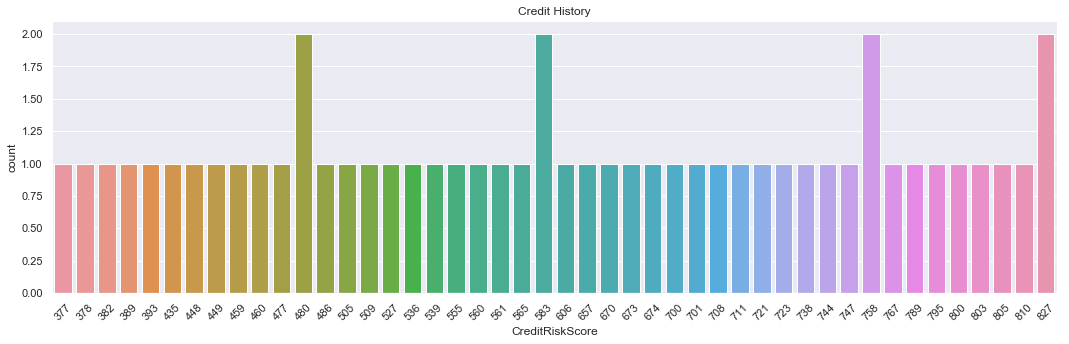

In [109]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(Train['CreditRiskScore'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

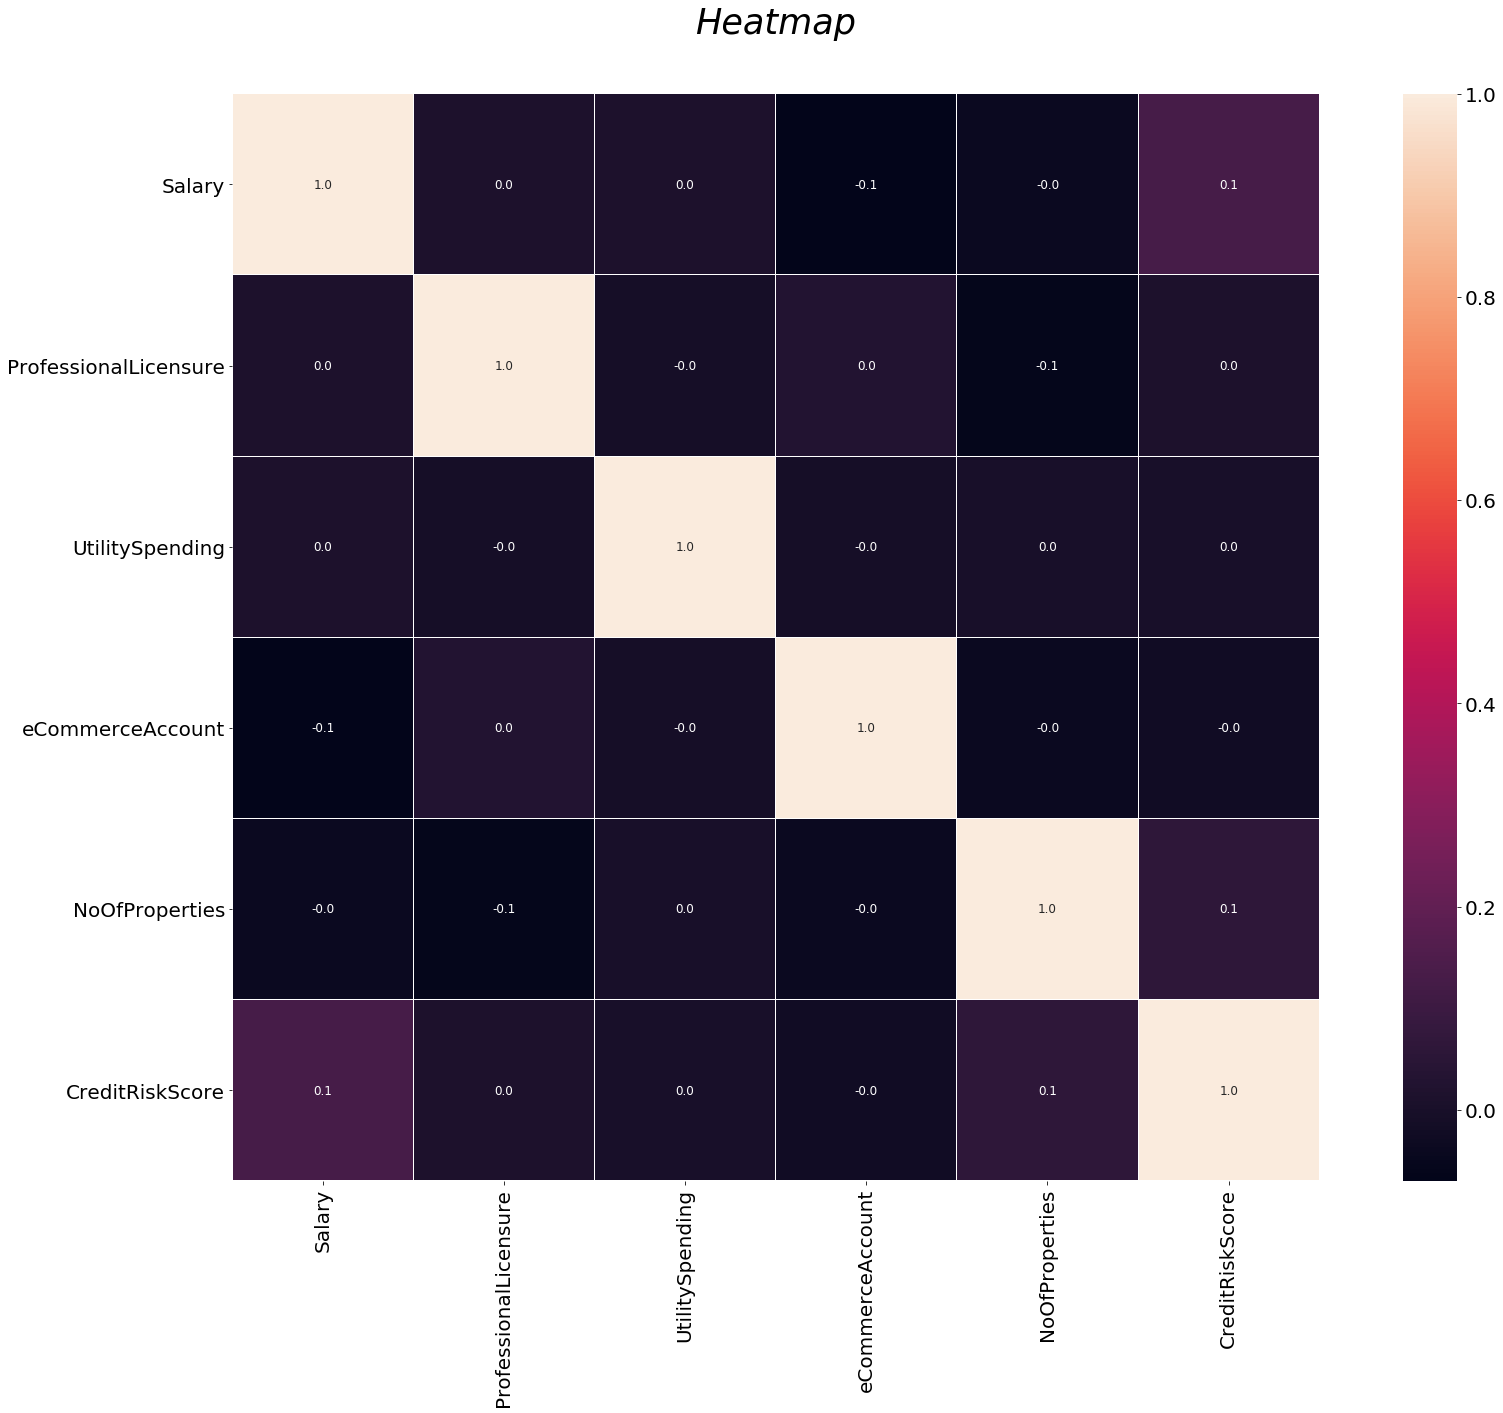

In [39]:
correlation_matrix = Train.corr().round(2)
# annot = True to print the values inside the square
#plt.figure(figsize=(8, 8))  fmt="d"
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(30,20))# Sample figsize in inchesTrue
#title for heatmap
title = "Heatmap"
plt.title(title, fontsize = 35,color='Black', fontstyle='italic')
ttl = ax.title
ttl.set_position([0.5, 1.05])
p=sns.heatmap(data=correlation_matrix, annot=True, fmt=".1f", linewidths=0.005, ax=ax, square=True, annot_kws={"size": 12})
plt.show()

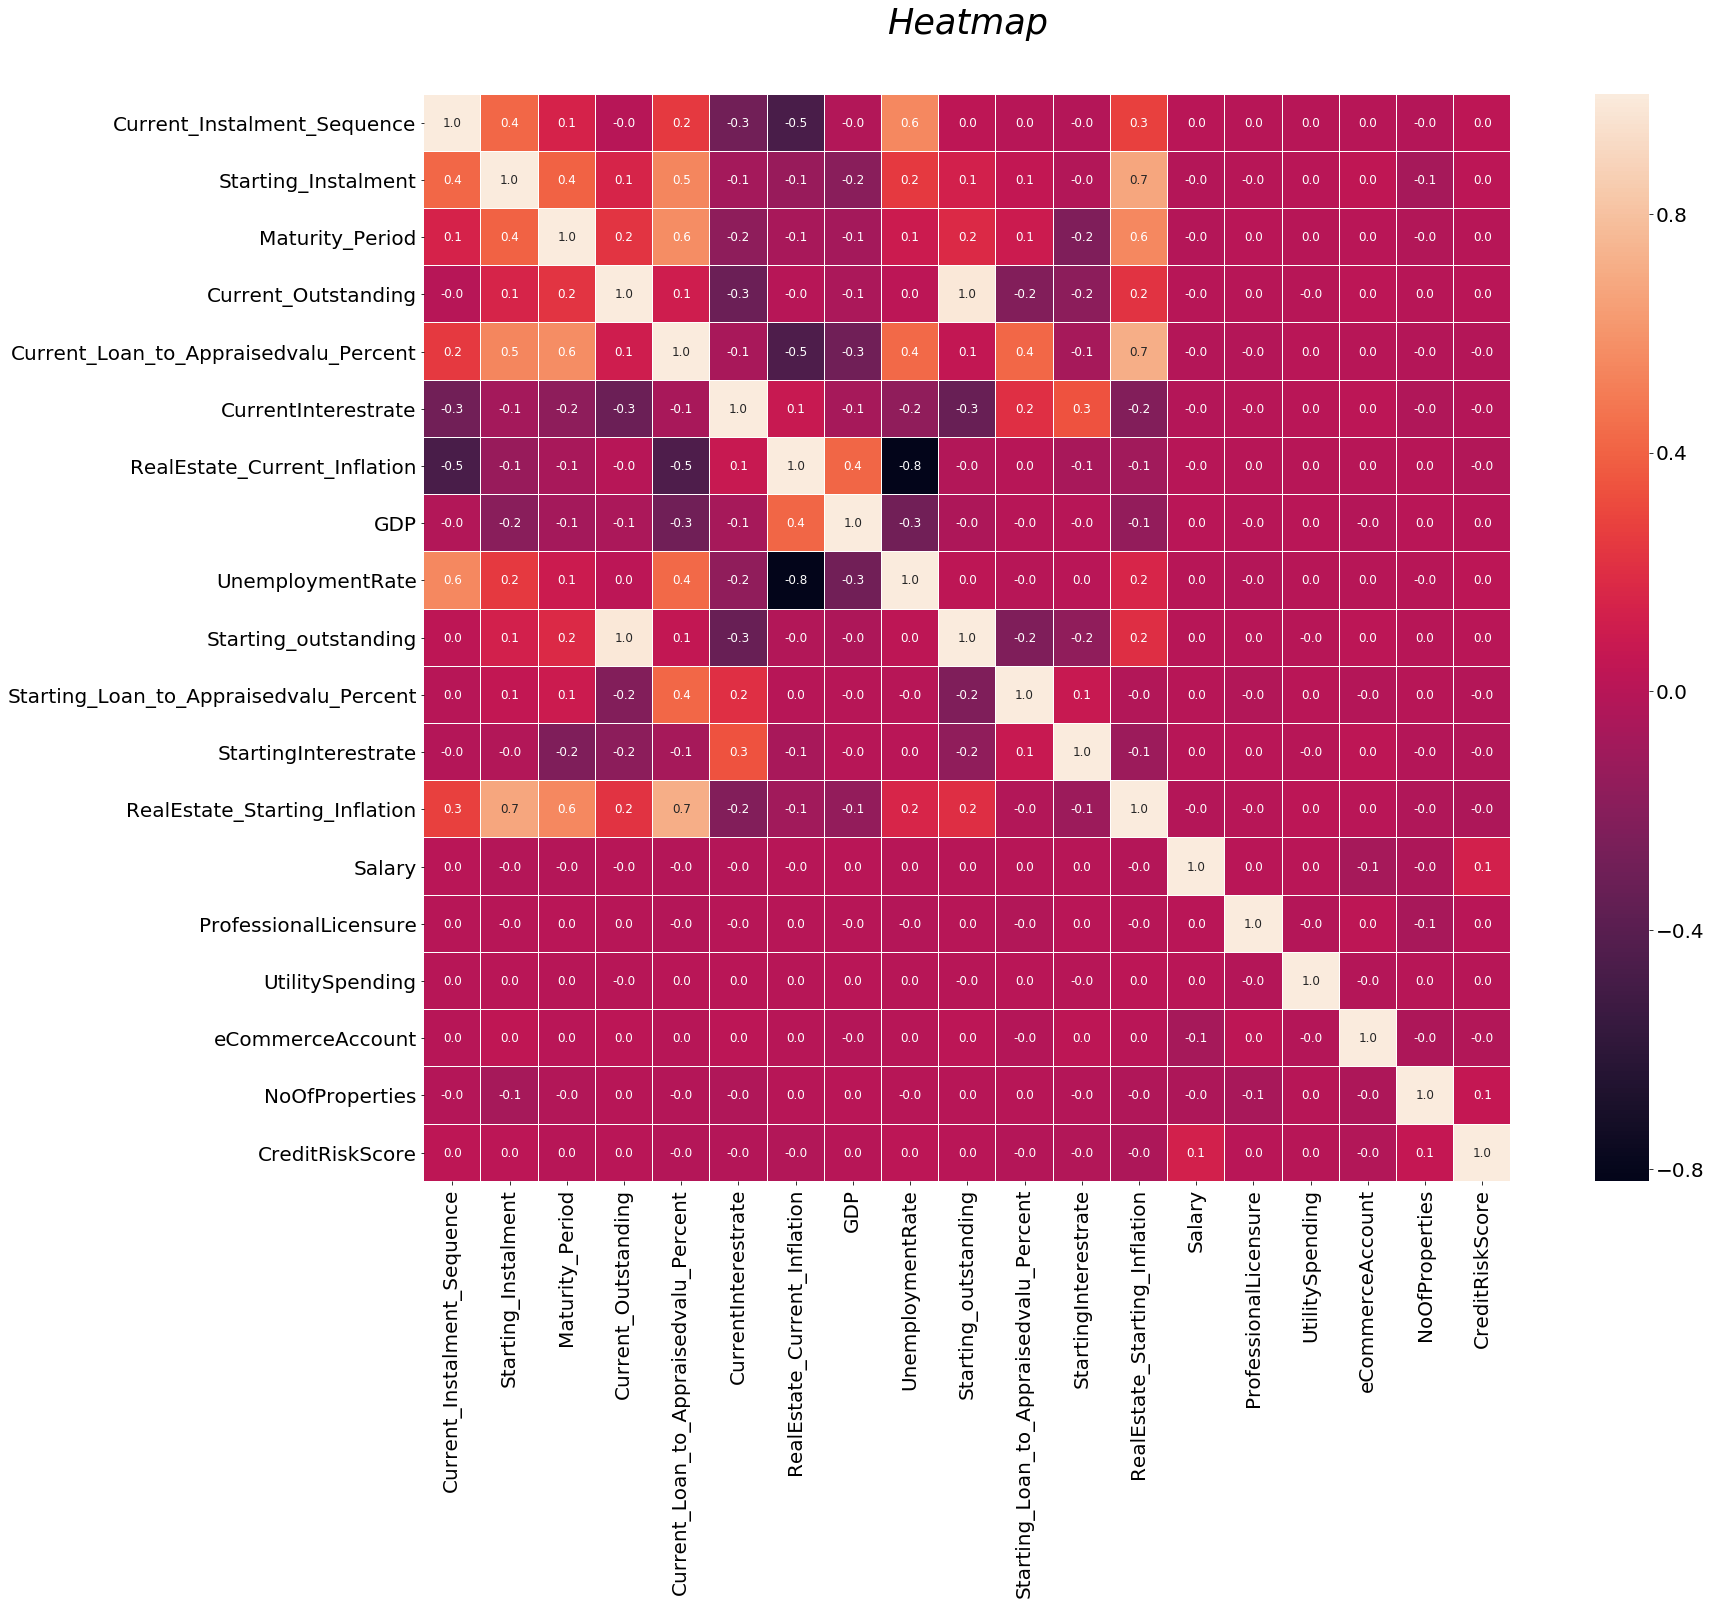

In [40]:
correlation_matrix = df_merge_col.corr().round(2)
# annot = True to print the values inside the square
#plt.figure(figsize=(8, 8))  fmt="d"
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(30,20))# Sample figsize in inchesTrue
#title for heatmap
title = "Heatmap"
plt.title(title, fontsize = 35,color='Black', fontstyle='italic')
ttl = ax.title
ttl.set_position([0.5, 1.05])
p=sns.heatmap(data=correlation_matrix, annot=True, fmt=".1f", linewidths=0.005, ax=ax, square=True, annot_kws={"size": 12})
plt.show()

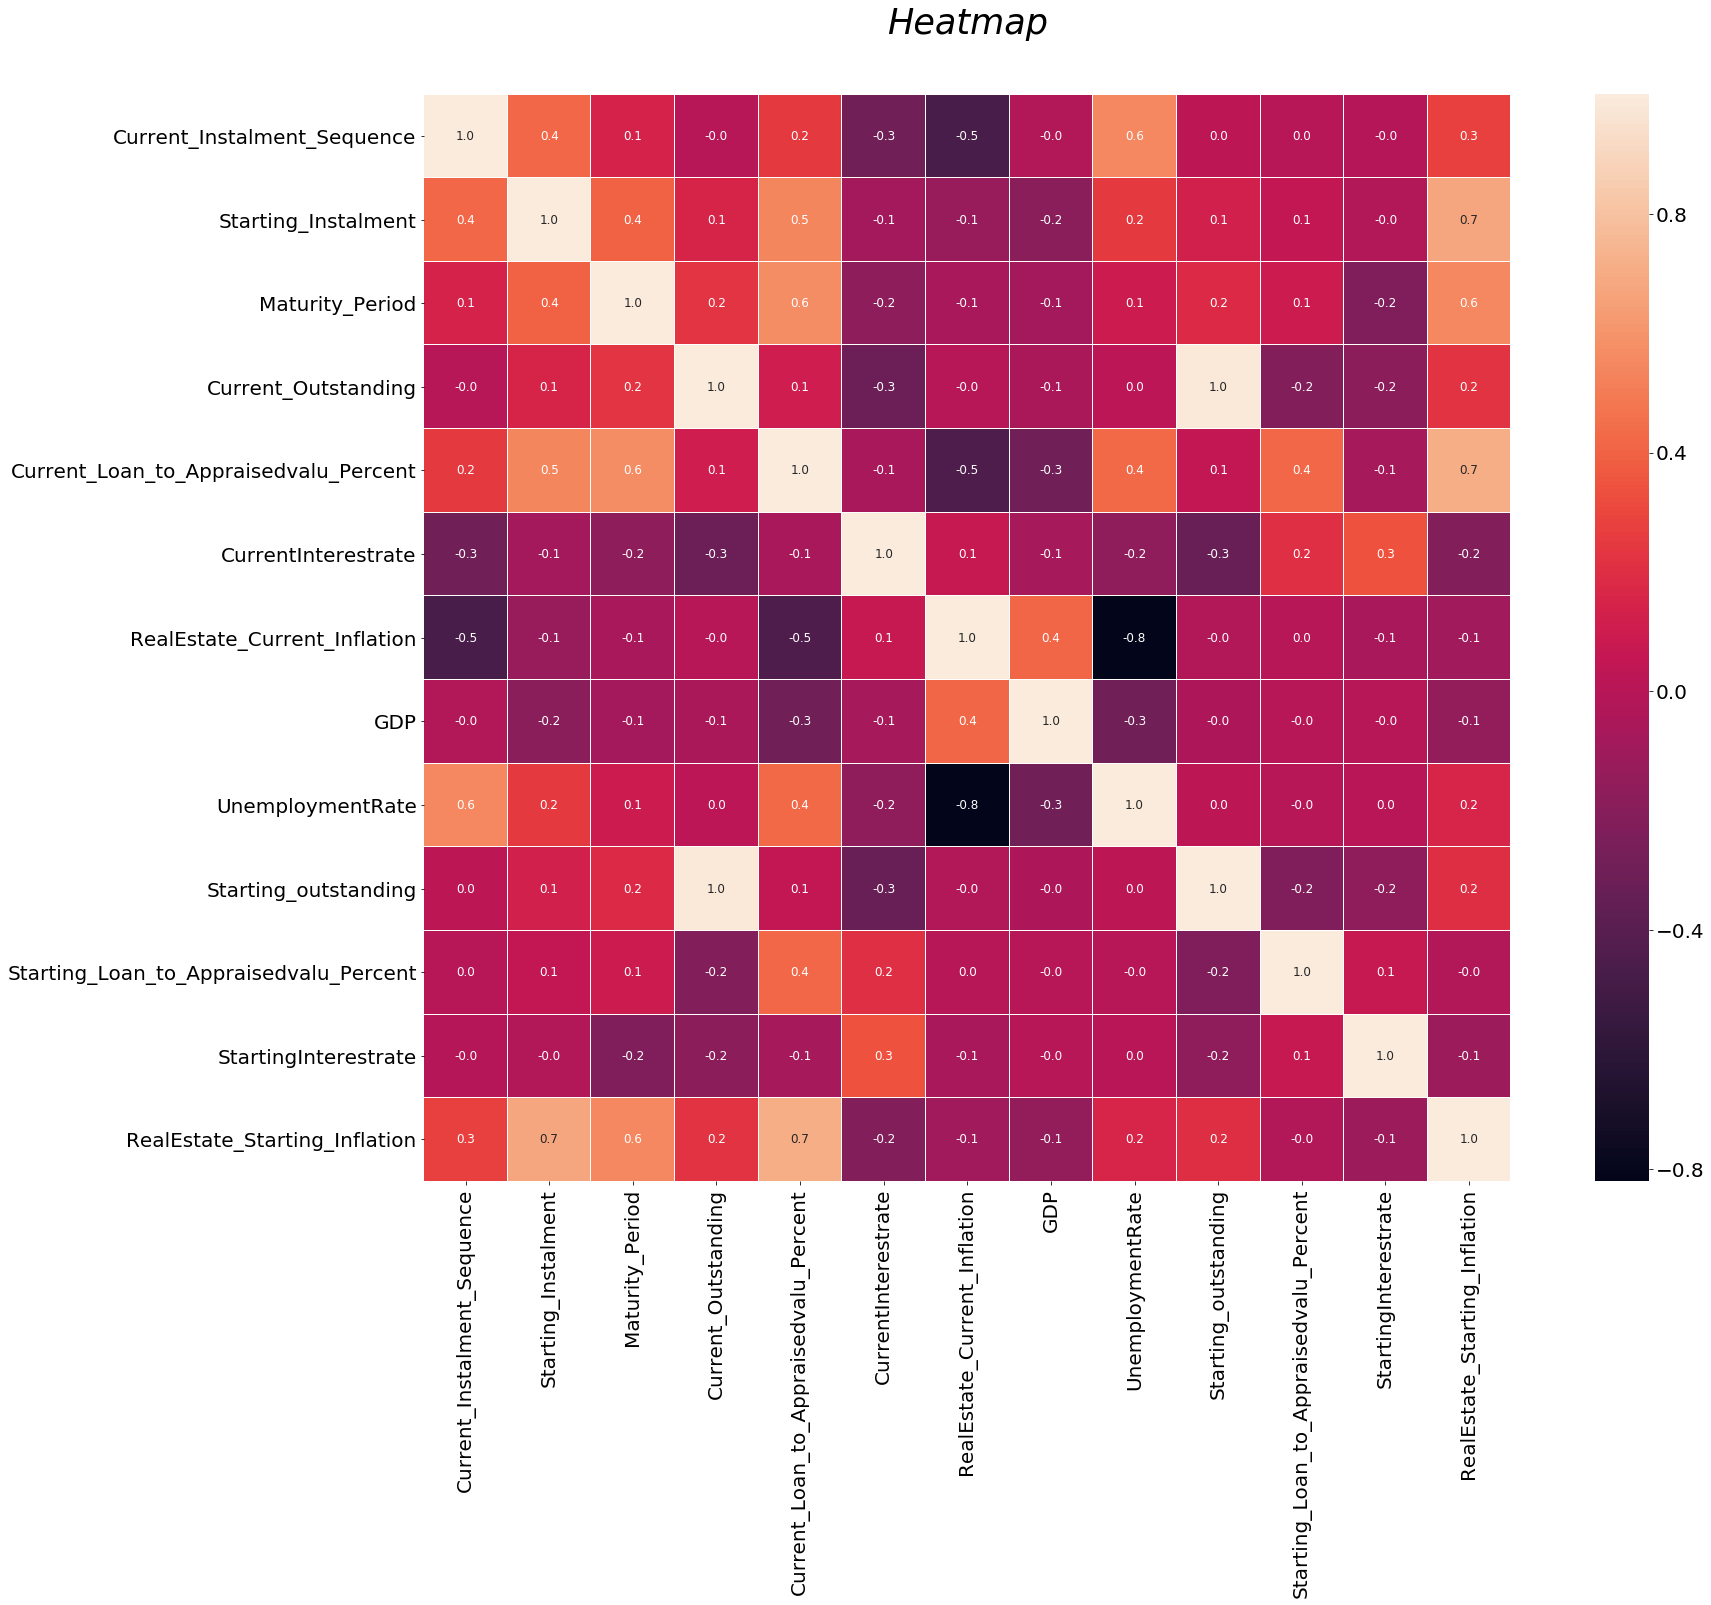

In [41]:
correlation_matrix = Train_PYMNT.corr().round(2)
# annot = True to print the values inside the square
#plt.figure(figsize=(8, 8))  fmt="d"
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(30,20))# Sample figsize in inchesTrue
#title for heatmap
title = "Heatmap"
plt.title(title, fontsize = 35,color='Black', fontstyle='italic')
ttl = ax.title
ttl.set_position([0.5, 1.05])
p=sns.heatmap(data=correlation_matrix, annot=True, fmt=".1f", linewidths=0.005, ax=ax, square=True, annot_kws={"size": 12})
plt.show()

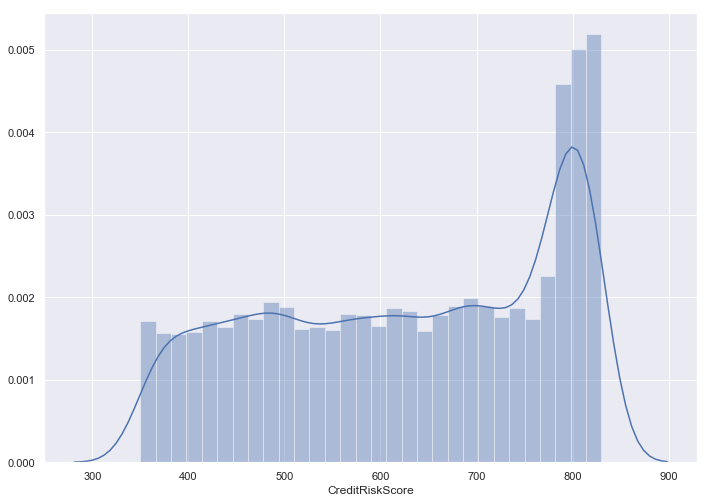

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Train['CreditRiskScore'], bins=30)
plt.title('Credit History')
plt.show()

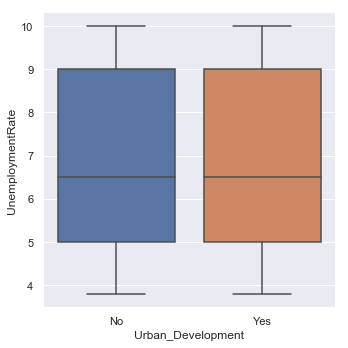

In [43]:
sns.catplot(x="Urban_Development",y="UnemploymentRate",kind='box',data=Train_PYMNT)
plt.title('Credit History')


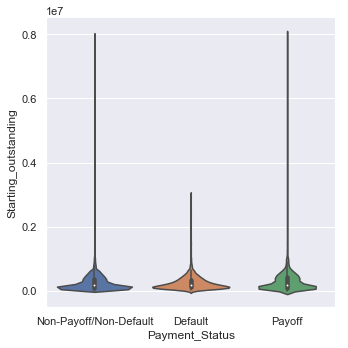

In [44]:
sns.catplot(x="Payment_Status",y="Starting_outstanding",kind='violin',data=Train_PYMNT)
plt.title('Credit History')


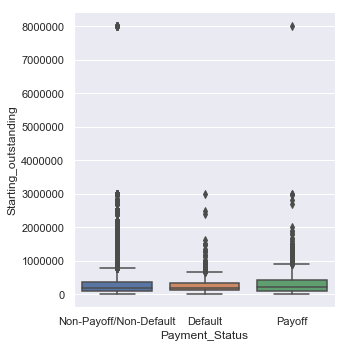

In [45]:
sns.catplot(x="Payment_Status",y="Starting_outstanding",kind='box',data=Train_PYMNT)

plt.title('Credit History')

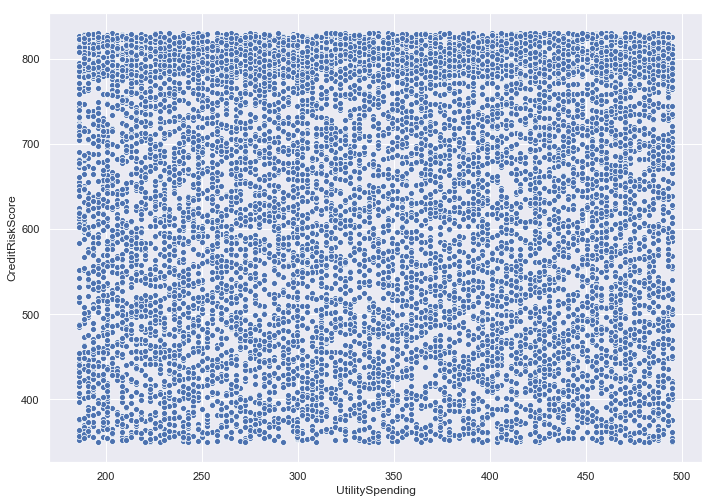

In [46]:
#simple scatter plot between two variables:
ax = sns.scatterplot(x="UtilitySpending", y="CreditRiskScore", data=Train)
plt.title('Credit History')

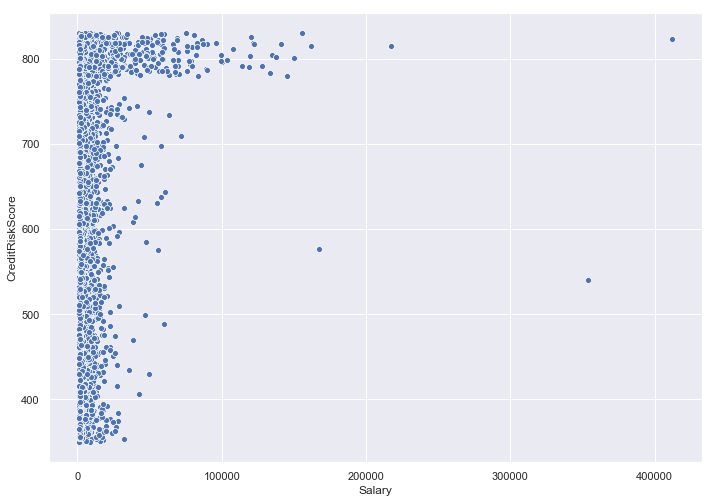

In [47]:
#simple scatter plot between two variables:
ax = sns.scatterplot(x="Salary", y="CreditRiskScore", data=Train)
plt.title('Credit History')

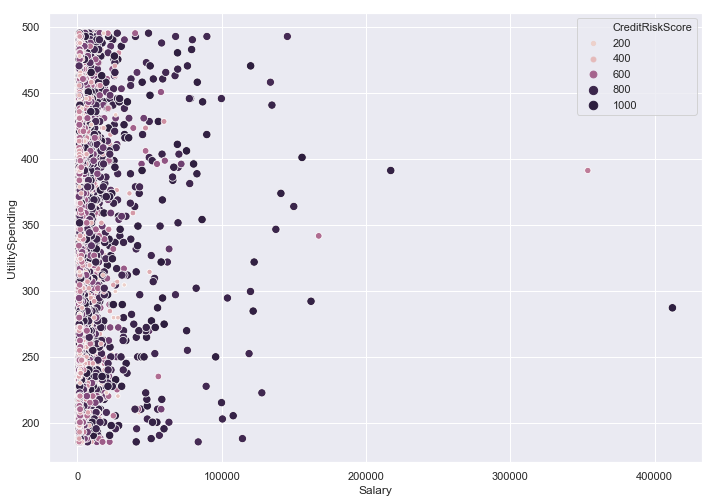

In [48]:
#Also show the quantitative variable by also using continuous colors:
ax = sns.scatterplot(x="Salary", y="UtilitySpending",
                     hue="CreditRiskScore", size="CreditRiskScore",
                     data=Train)
plt.title('Credit History')

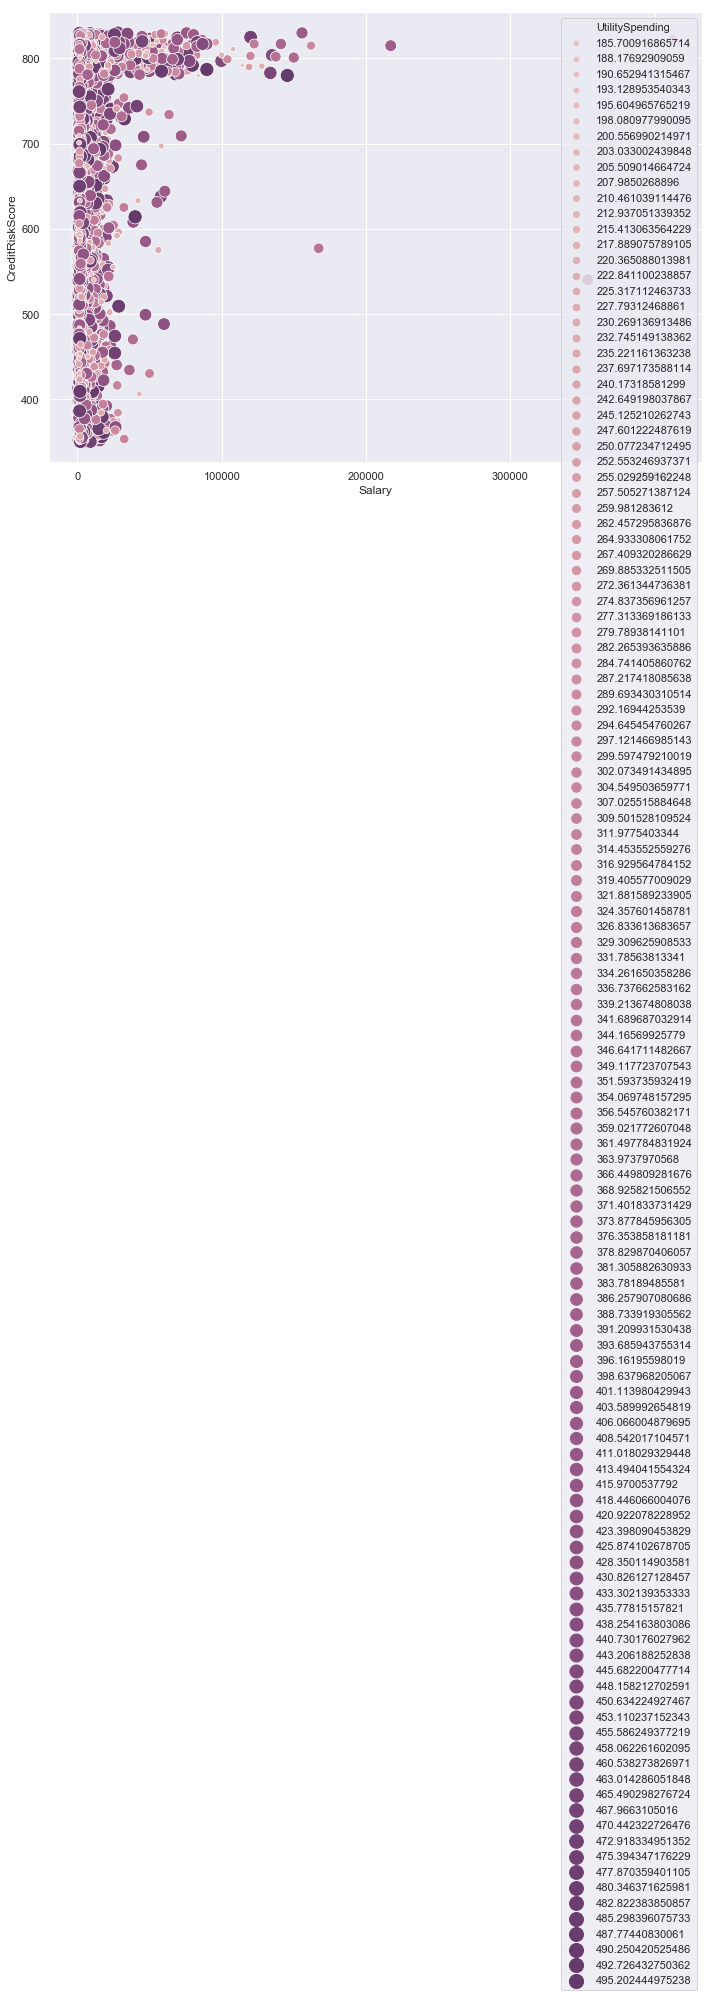

In [50]:
#Change the minimum and maximum point size and show all sizes in legend:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Salary", y="CreditRiskScore",
                      hue="UtilitySpending", size="UtilitySpending",
                      sizes=(20, 200), palette=cmap,
                      legend="full", data=Train)

In [106]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 18: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:18]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Co_cf = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

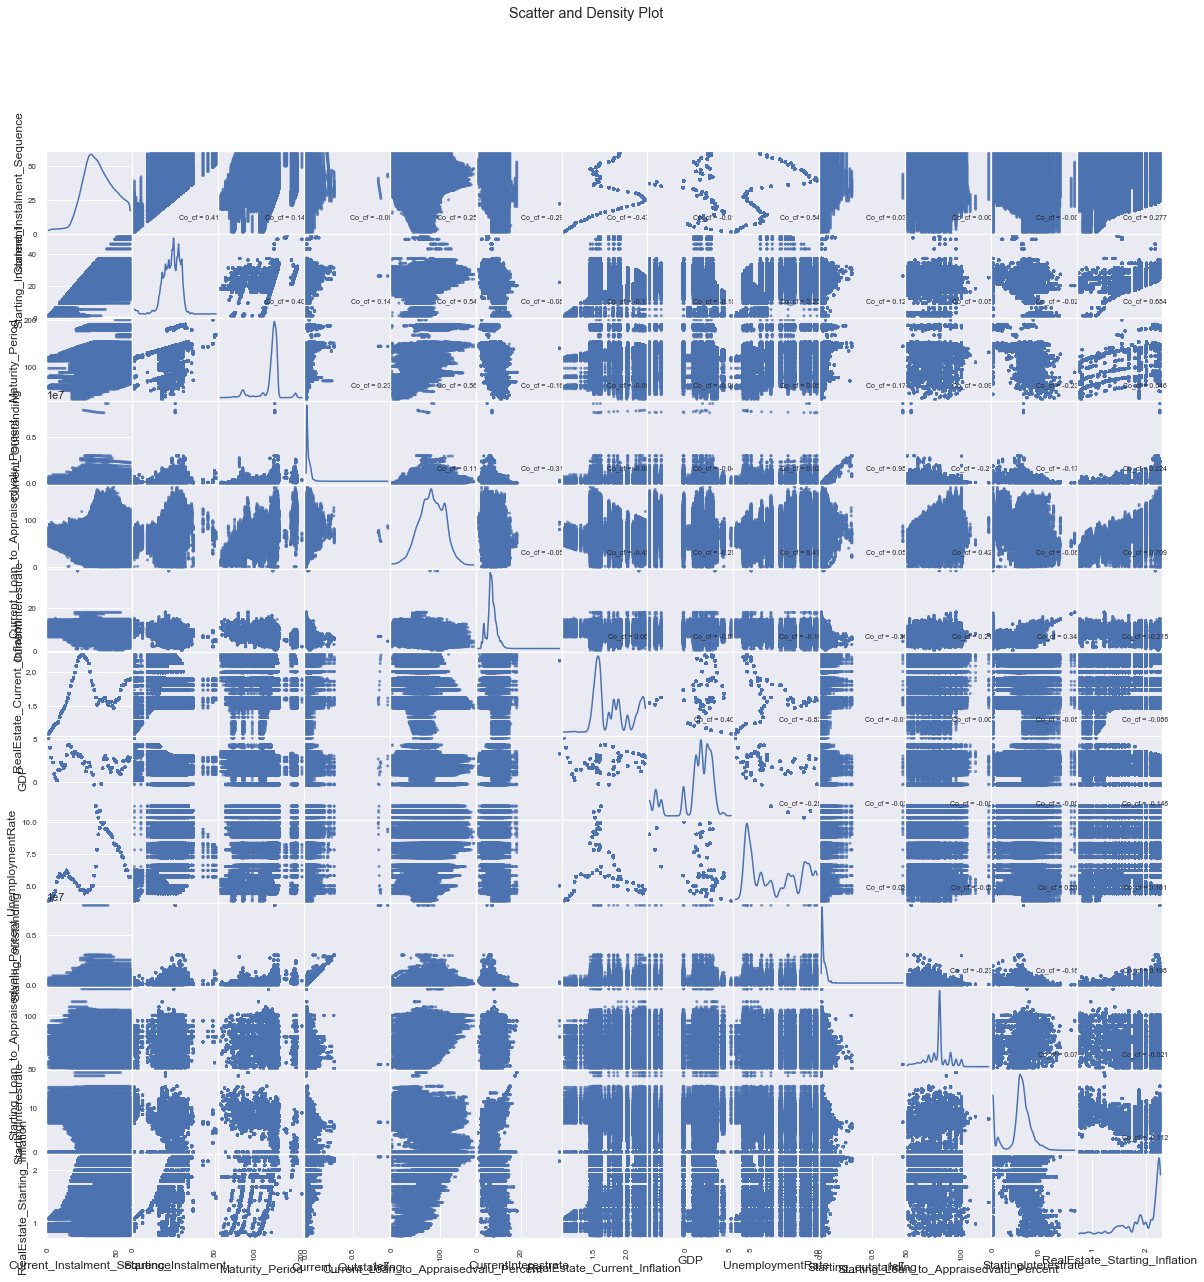

In [108]:
plotScatterMatrix(Train_PYMNT, 20, 7)

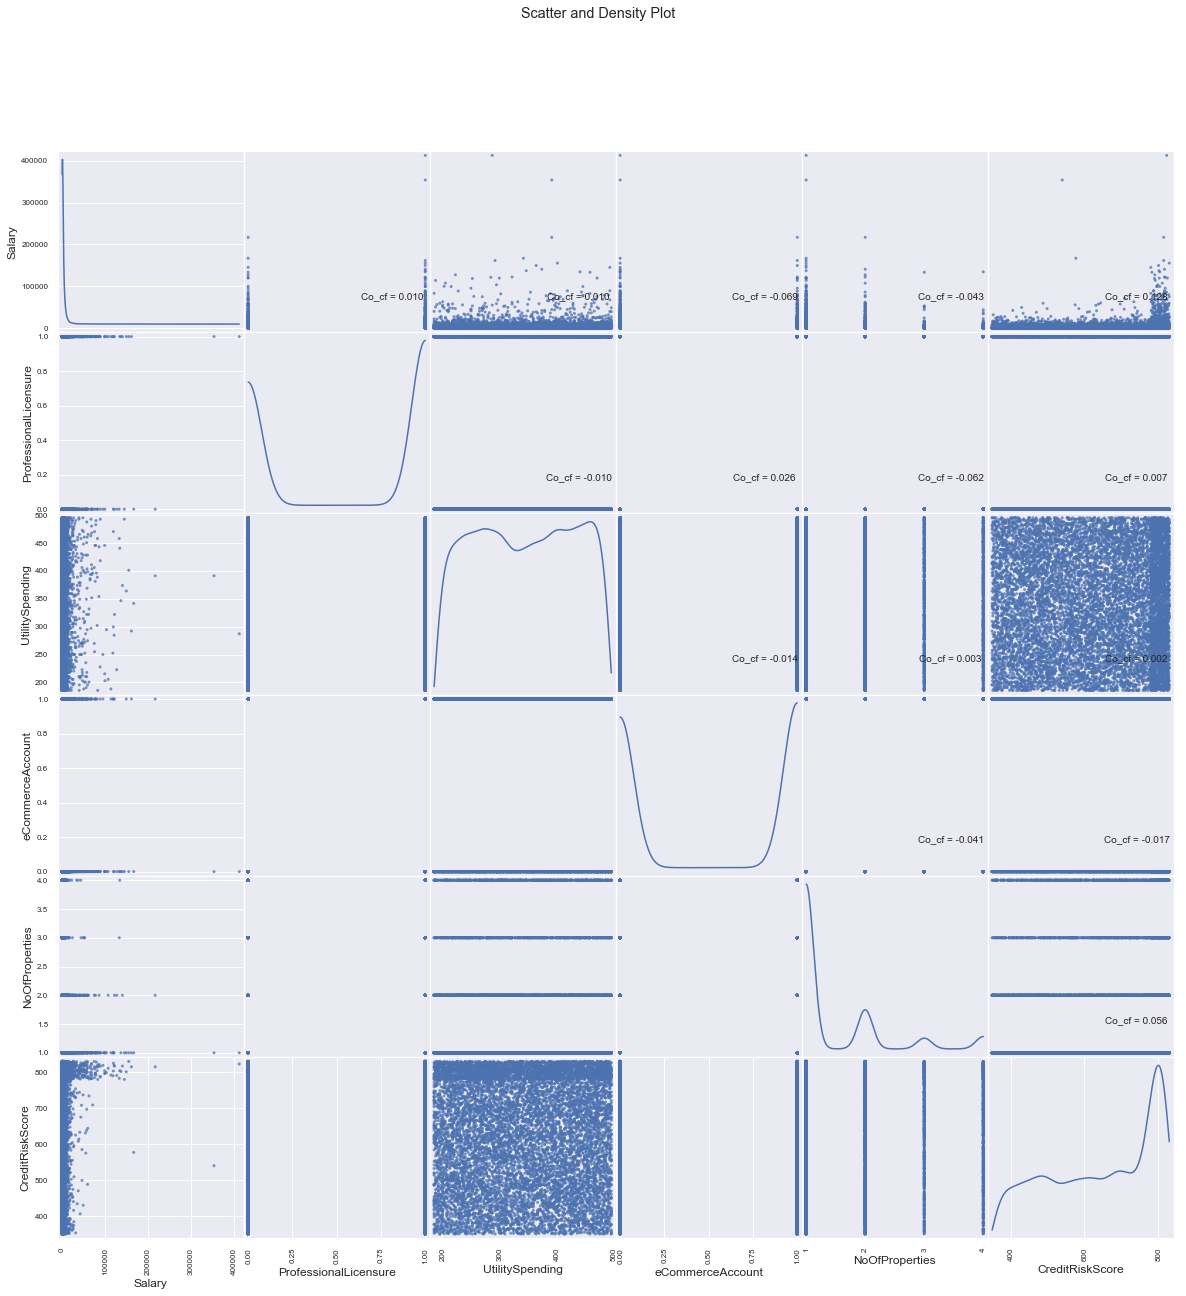

In [107]:
plotScatterMatrix(Train, 20, 10)

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

In [ ]:
#Vary the size with a categorical variable, and use a different palette:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Salary", y="CreditRiskScore",
                      hue="NoOfProperties", size="ProfessionalLicensure",
                      palette="Set2",
                      data=Train)


In [ ]:
#Show the grouping variable by varying both color and marker:
ax = sns.scatterplot(x="Salary", y="UtilitySpending", hue="CreditRiskScore", style="time", data=Train)



Text(0.5, 1.0, 'Salary Distribution')

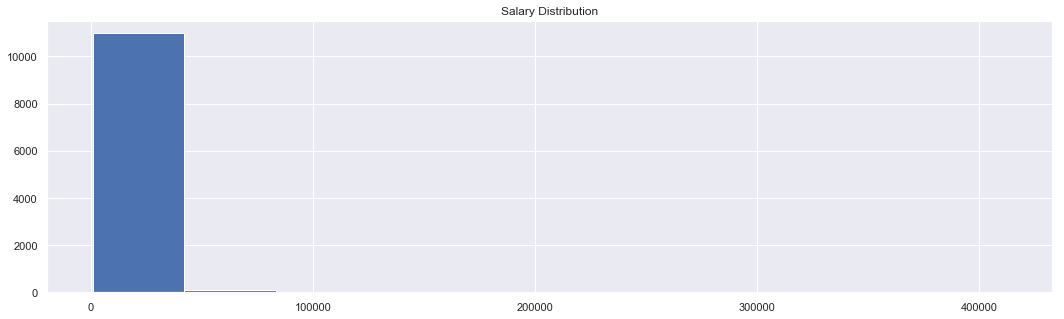

In [126]:
Train["Salary"].hist()

plt.title('Salary Distribution')
#sns.xtitle("Salary")

In [59]:
from datetime import date 
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age 

In [60]:
df_merge_col['DOB']=pd.to_datetime(df_merge_col['DOB'])

In [61]:
df_merge_col.head()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,...,Payment_Status,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore
0,C12116,25,25,113,41303.42,24.498336,9.2,2.2629,2.899137,4.7,...,Non-Payoff/Non-Default,C12116,1969-04-22,1238.006112,0.0,492.726433,1.0,No,2.0,711.0
1,C12116,26,25,113,41061.95,24.483867,9.2,2.2510,2.151365,4.7,...,Non-Payoff/Non-Default,C12117,1981-04-24,1633.000000,1.0,477.870359,1.0,Yes,1.0,767.0
2,C12116,27,25,113,40804.42,24.626795,9.2,2.2239,2.361722,4.4,...,Non-Payoff/Non-Default,C12118,1970-02-10,1489.000000,0.0,351.593736,1.0,Yes,1.0,827.0
3,C12116,28,25,113,40483.89,24.735883,9.2,2.1967,1.229172,4.6,...,Non-Payoff/Non-Default,C12119,1976-04-22,1241.000000,0.0,403.589993,1.0,No,1.0,795.0
4,C12116,29,25,113,40367.06,24.925476,9.2,2.1737,1.692969,4.5,...,Non-Payoff/Non-Default,C12120,1975-04-24,1074.000000,1.0,406.066005,1.0,No,1.0,827.0


In [62]:
df_merge_col['Age'] = df_merge_col['DOB'].apply(lambda x: calculateAge(x))


In [63]:
df_merge_col.head()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,...,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore,Age
0,C12116,25,25,113,41303.42,24.498336,9.2,2.2629,2.899137,4.7,...,C12116,1969-04-22,1238.006112,0.0,492.726433,1.0,No,2.0,711.0,50.0
1,C12116,26,25,113,41061.95,24.483867,9.2,2.2510,2.151365,4.7,...,C12117,1981-04-24,1633.000000,1.0,477.870359,1.0,Yes,1.0,767.0,38.0
2,C12116,27,25,113,40804.42,24.626795,9.2,2.2239,2.361722,4.4,...,C12118,1970-02-10,1489.000000,0.0,351.593736,1.0,Yes,1.0,827.0,49.0
3,C12116,28,25,113,40483.89,24.735883,9.2,2.1967,1.229172,4.6,...,C12119,1976-04-22,1241.000000,0.0,403.589993,1.0,No,1.0,795.0,43.0
4,C12116,29,25,113,40367.06,24.925476,9.2,2.1737,1.692969,4.5,...,C12120,1975-04-24,1074.000000,1.0,406.066005,1.0,No,1.0,827.0,44.0


In [65]:
df_merge_col = df_merge_col.drop(columns='DOB')



In [ ]:
Train['Salary'].plot.hist()

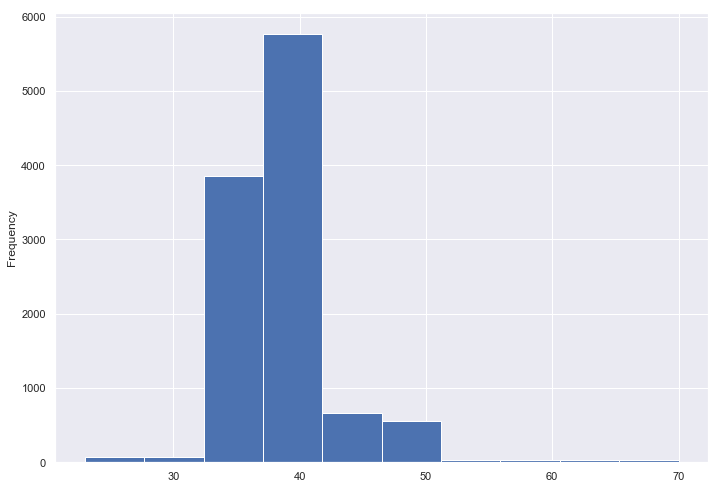

In [64]:
df_merge_col['Age'].plot.hist()

In [66]:
df_merge_col.head()

,CustomerID,Current_Instalment_Sequence,Starting_Instalment,Maturity_Period,Current_Outstanding,Current_Loan_to_Appraisedvalu_Percent,CurrentInterestrate,RealEstate_Current_Inflation,GDP,UnemploymentRate,...,Payment_Status,CustomerID,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore,Age
0,C12116,25,25,113,41303.42,24.498336,9.2,2.2629,2.899137,4.7,...,Non-Payoff/Non-Default,C12116,1238.006112,0.0,492.726433,1.0,No,2.0,711.0,50.0
1,C12116,26,25,113,41061.95,24.483867,9.2,2.2510,2.151365,4.7,...,Non-Payoff/Non-Default,C12117,1633.000000,1.0,477.870359,1.0,Yes,1.0,767.0,38.0
2,C12116,27,25,113,40804.42,24.626795,9.2,2.2239,2.361722,4.4,...,Non-Payoff/Non-Default,C12118,1489.000000,0.0,351.593736,1.0,Yes,1.0,827.0,49.0
3,C12116,28,25,113,40483.89,24.735883,9.2,2.1967,1.229172,4.6,...,Non-Payoff/Non-Default,C12119,1241.000000,0.0,403.589993,1.0,No,1.0,795.0,43.0
4,C12116,29,25,113,40367.06,24.925476,9.2,2.1737,1.692969,4.5,...,Non-Payoff/Non-Default,C12120,1074.000000,1.0,406.066005,1.0,No,1.0,827.0,44.0


In [67]:
(pd.to_datetime('today').year-pd.to_datetime('1969-04-22').year)


50

Text(0.5, 0, 'Income / spend')

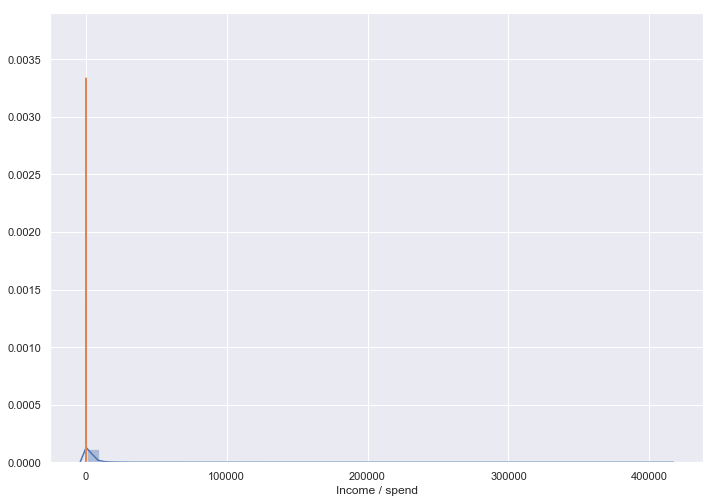

In [68]:
plot_income = sns.distplot(Train["Salary"])
plot_spend = sns.distplot(Train["UtilitySpending"])
plt.xlabel('Income / spend')


In [70]:
Train.head()

,CustomerID,DOB,Salary,ProfessionalLicensure,UtilitySpending,eCommerceAccount,SocialMediaAccount,NoOfProperties,CreditRiskScore
0,C12116,1969-04-22,1238.006112,0,492.726433,1,No,2,711
1,C12117,1981-04-24,1633.000000,1,477.870359,1,Yes,1,767
2,C12118,1970-02-10,1489.000000,0,351.593736,1,Yes,1,827
3,C12119,1976-04-22,1241.000000,0,403.589993,1,No,1,795
4,C12120,1975-04-24,1074.000000,1,406.066005,1,No,1,827


In [71]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 9 columns):
CustomerID               11093 non-null object
DOB                      11093 non-null object
Salary                   11093 non-null float64
ProfessionalLicensure    11093 non-null int64
UtilitySpending          11093 non-null float64
eCommerceAccount         11093 non-null int64
SocialMediaAccount       11093 non-null object
NoOfProperties           11093 non-null int64
CreditRiskScore          11093 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 780.1+ KB


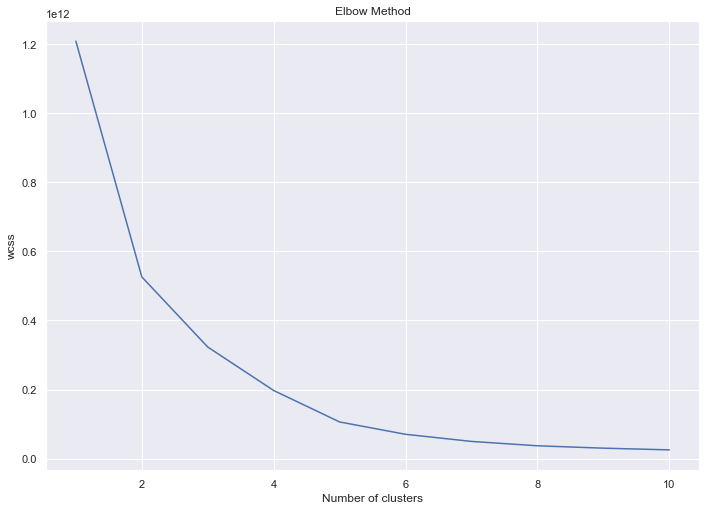

In [98]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df1)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()